In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy import optimize

plt.style.use('dark_background')
color = ['#8dd3c7','#feffb3','#bfbbd9','#fa8174','#81b1d2','#fdb462','#b3de69','#bc82bd','#ccebc4','#ffed6f']




In [33]:
# path = '/Users/wendy/Desktop/111/GMA/111B_Lab_Voltage_variation_1.csv'
path_bg = '/Users/wendy/Desktop/111/GMA/Wendy&Yilun/wendy have fun/01_28_2022_17_09_05/final_aved_Data3min.csv'

In [34]:
background = pd.read_csv(path_bg)
def cutdat(data,lowlim,highlim):
    data_x = data['freq'].values
    data_y = data['vals'].values
    data_y = data_y[(data_x > low_lim) & (data_x < up_lim)]
    data_x = data_x[(data_x > low_lim) & (data_x < up_lim)]
    return(data_x,data_y)
def subtract(data,time,background = background,filenumber = 1):
    freq = data[0].values
    data_sub = data[1].values-background['values'].values/3*(time/60)
    err = (np.sqrt(data[1].values) + (time/180)**2*background['std'])/filenumber
    result = pd.DataFrame([])
    result['freq'] = freq
    result['vals'] = data_sub
    result['std'] = err
    
    return result
def exp(x,ave,sigma,amp,c,b):
    return(amp*np.exp(-(x-ave)**2/(2*sigma**2))+c*x+b)
def mt_fit(data_x,data_y,err_x ,err_y,up_lim,low_lim,N,p0=[1.25,0.05,25,0.1, 0]):

    

    data_y = data_y[(data_x > low_lim) & (data_x < up_lim)]
    
    if type(err_x) is not float:
        err_x = err_x[(data_x > low_lim) & (data_x < up_lim)]
    if type(err_y) is not float:
        err_y = err_y[(data_x > low_lim) & (data_x < up_lim)]
    data_x = data_x[(data_x > low_lim) & (data_x < up_lim)]
    
    func = exp
    ave = []
    sigma = []
    amp = []
    c = []
    b = []
    for i in range(N):
#         data_xe = np.array(data_x)+np.random.normal(0,err_x)
#         data_ye = np.array(data_y)+np.random.normal(0,err_y)

        data_xe = np.random.normal(data_x,err_x)
        data_ye = np.random.normal(data_y,err_y)

        paras, _ = optimize.curve_fit(func, data_xe, data_ye,p0 = p0)
        ave += [paras[0]]
#         print(ave)
        sigma += [paras[1]]
        amp += [paras[2]]
        c += [paras[3]]
        b += [paras[4]]
        
    
#     fig, ax = plt.subplots(figsize = (16,12))

#     ax.scatter(data_x, data_y,s = 0.3)
#     ax.plot(data_x,exp(data_x,*paras), )
#     plt.plot()
    ave_a = np.mean(ave)
    sigma_a = np.mean(sigma)
    amp_a = np.mean(amp)
    c_a = np.mean(c)
    b_a = np.mean(b)
    paras = [ave_a,sigma_a,amp_a,c_a,b_a]
    
    ave_err = np.std(ave)
    sigma_err = np.std(sigma)
    amp_err = np.std(amp)
    c_err = np.std(c)
    b_err = np.std(b)
    obs = data_y
    model = exp(data_x,*paras)
    error = err_y
    def chisquared(obs, model, error):
        return np.average(((obs - model) / error)**2)
    
    chi = chisquared(obs,model,error)
    errs = [ave_err,sigma_err,amp_err,c_err,b_err,chi]
#     errs = [ave_err,sigma_err,amp_err,c_err,b_err]
    
    plt.scatter(obs, error)
    plt.scatter(obs, obs-model)
    
    return (paras, errs)

In [35]:
files = glob('**.dat',recursive = True)

In [37]:
dat_sub_cs300 = subtract(data,300,filenumber = 1)

In [78]:
amp = []
amp_err = []
chi = []

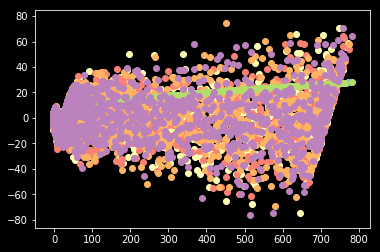

In [79]:
for file in files: 
    data = pd.read_csv(file,skiprows = 2,sep="\s+", header = None,usecols = [0,1])
    dat_sub_cs300 = subtract(data,300,filenumber = 1)
    up_lim = 1.2
    low_lim = 0.8
    #Finally do the montecarlo fit with estimate of error
    dat_sub = dat_sub_cs300
    datx, daty = cutdat(dat_sub,low_lim,up_lim)
    par, _ = optimize.curve_fit(exp,dat_sub['freq'].values,dat_sub['vals'].values)
    Cs11_paras, Cs11_errs = mt_fit(dat_sub['freq'].values,dat_sub['vals'].values,0.0, dat_sub['std'].values, \
           up_lim,low_lim,1000,p0 = par)
    amp +=[Cs11_paras[2]]
    amp_err += [Cs11_errs[2]]
    chi +=[Cs11_errs[-1]]

In [80]:
amp

[707.8040685110444, 707.0199024506553, 705.0803455712497, 705.5174407615466]

In [81]:
amp_err

[1.7563100999217445, 1.8212776413630472, 1.757181147281196, 1.85010648342036]

In [92]:
n = 0.3
def Iabs(I0):
    return(I0/n)

In [93]:
Iabs_err = np.average(np.array(amp_err)/0.3)

In [94]:
Iabs_val = np.average(Iabs(np.array(amp)))

In [95]:
Iabs_err

5.9873961433219565

In [96]:
Iabs_val

2354.5181310787466